In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import gmaps
from api_keys import g_key
import os
import csv

In [2]:
clean_indeed_df = pd.read_csv("CLEAN Indeed Data Set.csv")

# clean_indeed_df.head()

In [36]:
# Get indexes where name column has value Missing
MissingData = clean_indeed_df[clean_indeed_df["Location"] == "Missing"].index
 
# Delete these row indexes from dataFrame
updated_df = clean_indeed_df.drop(MissingData , inplace=True)

clean_indeed_df

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,0,0,TX,Missing,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62,4,OR,Missing,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158,4,DC,Missing,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495,4,TX,Missing,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,Senior Big Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Kafka', 'HBase', 'Java', '...",6,Workbridge Associates,40,3,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31,4,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


In [4]:
clean_indeed_df.columns

Index(['Job_Title', 'Queried_Salary', 'Job_Type', 'Skill', 'No_of_Skills',
       'Company', 'No_of_Reviews', 'No_of_Stars', 'Location',
       'Company_Revenue', 'Company_Employees', 'Company_Industry', 'python',
       'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark',
       'java', 'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC',
       'NC', 'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [5]:
#import dataframe that includes lat/lng for states

states_df = pd.read_csv("State_Abbrev_List.csv")

# states_df.head()

In [6]:
#clean states dataframe

states_df = states_df.drop(columns=["Unnamed: 4", "State"])

states_df.head()

,Location,Latitude,Longitude
0,AK,66.160507,-153.369141
1,AL,32.318230,-86.902298
2,AR,34.799999,-92.199997
3,AZ,34.048927,-111.093735
4,CA,36.778259,-119.417931


In [7]:
#merge dataframes 

merged_df = pd.merge(clean_indeed_df, states_df, on="Location", how="inner")

# merged_df

In [8]:
#change salary ranges to single values
merged_df["Queried_Salary"].replace({"<80000": "80000", "80000-99999": "99999", "100000-119999":"119999", "120000-139999":"139999", "140000-159999":"159999", ">160000":"160000"}, inplace=True)

# merged_df.head()

In [9]:
# check salary values 

#merged_df["Queried_Salary"].value_counts()

In [10]:
#change salary data type to float for use in heatmap
merged_df["Queried_Salary"] = merged_df["Queried_Salary"].astype(float, 2)

# merged_df

In [11]:
merged_df.dtypes

Job_Title                            object
Queried_Salary                      float64
Job_Type                             object
Skill                                object
No_of_Skills                          int64
Company                              object
No_of_Reviews                         int64
No_of_Stars                           int64
Location                             object
Company_Revenue                      object
Company_Employees                    object
Company_Industry                     object
python                                int64
sql                                   int64
machine learning                      int64
r                                     int64
hadoop                                int64
tableau                               int64
sas                                   int64
spark                                 int64
java                                  int64
Others                                int64
CA                              

In [12]:
# Where are the jobs?
# Location and Salary (heat map)

In [13]:
# configure gmaps

gmaps.configure(api_key = g_key)

In [14]:
#establish locations variable

locations = merged_df[["Latitude", "Longitude"]]
locations.head()

,Latitude,Longitude
0,38.573936,-92.60376
1,38.573936,-92.60376
2,38.573936,-92.60376
3,38.573936,-92.60376
4,38.573936,-92.60376


In [22]:
#establish weights variable

salary = merged_df["Queried_Salary"]

average_salary = merged_df["Queried_Salary"].mean()

salary_norm = merged_df["Queried_Salary"] / average_salary

salary_norm

# merged_df["Queried_Salary"].value_counts()



0       0.643972
1       0.643972
2       0.643972
3       0.643972
4       0.804958
          ...   
5376    0.804958
5377    0.804958
5378    0.965951
5379    0.965951
5380    0.965951
Name: Queried_Salary, Length: 5381, dtype: float64

In [23]:
#create heatmap

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=salary_norm, dissipating=False, max_intensity=300, point_radius = 5)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
plt.savefig("Location_vs_Salary.png")

<Figure size 432x288 with 0 Axes>

In [ ]:
# Are more skills needed for higher salary ranges?
# Bar plot

In [32]:
locations = merged_df["Queried_Salary"]

skills = merged_df["No_of_Skills"]



5381

In [45]:
grouped_skills_df = merged_df.groupby("Location").nunique()["No_of_Skills"]

grouped_skills_df.index

Index(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA',
       'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY'],
      dtype='object', name='Location')

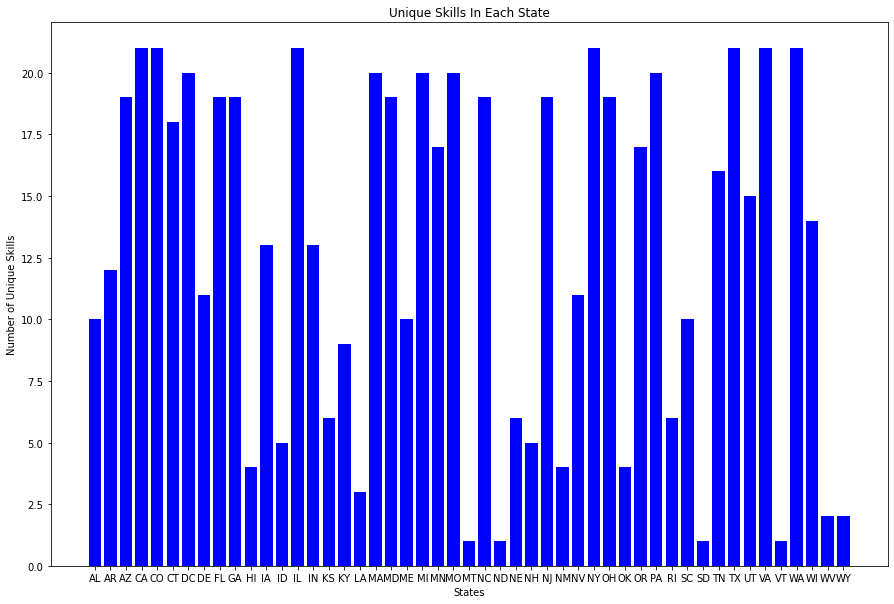

In [66]:
# x_axis = np.arange(len(grouped_skills_df))

plt.figure(figsize=(15, 10))

plt.bar(grouped_skills_df.index, grouped_skills_df, color="blue", alpha=1, align="center")

plt.title("Unique Skills In Each State")
plt.xlabel("States")
plt.ylabel("Number of Unique Skills")

plt.show()

In [63]:
plt.savefig("Unique_Skills_by_State.png")

<Figure size 432x288 with 0 Axes>